# Import dependencies

In [33]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from random import seed
from random import random
from random import randrange
import random
import keras
from keras.datasets import fashion_mnist 
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,KFold
from sklearn.neural_network import MLPClassifier
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

# Import data and preproccesing steps

In [2]:
x = pd.read_csv("handwritten_digits_images.csv")
y_panda = pd.read_csv("handwritten_digits_labels.csv")
print("Shape of X: ", x.shape)
print("Shape of y: ", y_panda.shape)

Shape of X:  (69999, 784)
Shape of y:  (69999, 1)


In [ ]:
def label_distribution(y):
    n_labels = [0]*10
    for i in y:
        n_labels[i] += 1
    for i in range(len(n_labels)):
        n_labels[i] = round(n_labels[i]/len(y), 2)
    print("label distr. from left to right percentage of label 0,1,2...,9 : ", n_labels) #printing label distribution in percentage of size of y

In [4]:
X = x.to_numpy()
y_nd_array = y_panda.to_numpy()
y = y_nd_array.flatten()
np.random.seed(123)
idx = np.random.permutation(len(y)) #shuffling data and labels
X,y = X[idx], y[idx]
X  = X.astype(float)/255
label_distribution(y)
print("Shape of X: ", X.shape)
print("Shape of y: ", y.shape)

labels distribution:  [0.1, 0.11, 0.1, 0.1, 0.1, 0.09, 0.1, 0.1, 0.1, 0.1]
Shape of X:  (69999, 784)
Shape of y:  (69999,)


In [5]:
# splitting data into four parts: |train|val|cross_validation|test|
seed = 23
X_train_temp, X_cross_temp, y_train_temp, y_cross_temp = train_test_split(X, y, test_size=0.2, random_state=seed)

X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.25, random_state=seed)

X_cross_train, X_test, y_cross_train, y_test = train_test_split(X_cross_temp, y_cross_temp, test_size=0.5, random_state=seed)

print("shape of X_cross_train: ", X_cross_train.shape, "Shape of y_cross_val: ", y_cross_train.shape)
label_distribution(y_cross_train)
print("shape of X_train: ", X_train.shape, "Shape of y_train: ", y_train.shape)
label_distribution(y_train)
print("shape of X_val: ", X_val.shape, "Shape of y_val: ", y_val.shape)
label_distribution(y_val)
print("shape of X_test: ", X_test.shape, "Shape of y_test: ", y_test.shape)
label_distribution(y_test)

# reshaping datapoints for convolutional neural network(cnn)
y_categorical_train = to_categorical(y_train)
y_categorical_val = to_categorical(y_val)
X_cnn_train = X_train.reshape(-1, 28,28, 1)
X_cnn_val = X_val.reshape(-1, 28,28, 1)

shape of X_cross_train:  (7000, 784) shape of y_cross_val:  (7000,)
labels distribution:  [0.09, 0.11, 0.1, 0.1, 0.1, 0.09, 0.1, 0.11, 0.1, 0.1]
shape of X_train:  (41999, 784) shape of y_train:  (41999,)
labels distribution:  [0.1, 0.11, 0.1, 0.1, 0.1, 0.09, 0.1, 0.11, 0.1, 0.1]
shape of X_val:  (14000, 784) shape of y_val:  (14000,)
labels distribution:  [0.1, 0.11, 0.1, 0.1, 0.1, 0.09, 0.09, 0.1, 0.1, 0.1]
shape of X_test:  (7000, 784) shape of y_test:  (7000,)
labels distribution:  [0.1, 0.11, 0.1, 0.1, 0.1, 0.09, 0.11, 0.1, 0.09, 0.1]


label:  2


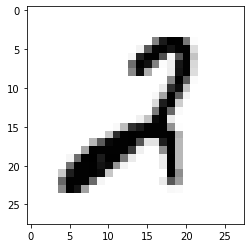

In [6]:
#printing picture and label
X_img = X.reshape(X.shape[0], 28, 28)
img = X_img[0]
plt.imshow(img, cmap="Greys")
print("label: ", y[0])

## Testing Classifier

In [7]:
rfc = RandomForestClassifier(random_state = 23, n_estimators = 100)
rfc.fit(X_train, y_train)
score_rfc = rfc.score(X_val, y_val)
print("Random Forest score: ", score_rfc)

0.9659285714285715


In [8]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
score_decision_tree =  decision_tree.score(X_val, y_val)
print("Decision tree score: ", score_decision_tree)

Decision tree score:  0.8567857142857143


In [9]:
log_reg = LogisticRegression(multi_class = 'auto')
log_reg.fit(X_train, y_train)
score_log_reg = log_reg.score(X_val, y_val)
print("Logistical regression score: ", score_log_reg)

C:\Users\hfv\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistical regression score:  0.9164285714285715


In [10]:
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
score_mlp = mlp.score(X_val, y_val)
print("Multi layer perceptron score: ", score_mlp)

Multi layer perceptron score:  0.9734285714285714


In [11]:
svc = SVC(gamma = 'scale')
svc.fit(X_test, y_test)
score_svc = svc.score(X_val, y_val)
print("support vector machine score: ", score_svc)

support vector machine score:  0.9555714285714285


In [12]:
knn = KNeighborsClassifier(n_jobs=-1)
knn.fit(X_test, y_test)
score_knn = knn.score(X_val, y_val)
print("Knearest neighbour score: ", score_knn)

Knearest neighbour score:  0.9388571428571428


In [13]:
def cnn(activation):
    model = Sequential()
    
    model.add(Conv2D(64, (3,3), input_shape=(28, 28, 1), kernel_initializer=keras.initializers.RandomNormal(seed=1337), bias_initializer=keras.initializers.Constant(value=0.1)))
    model.add(Activation(activation))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(64, (3,3), kernel_initializer=keras.initializers.RandomNormal(seed=1337), bias_initializer=keras.initializers.Constant(value=0.1)))
    model.add(Activation(activation))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dense(64, kernel_initializer=keras.initializers.RandomNormal(seed=1337), bias_initializer=keras.initializers.Constant(value=0.1)))

    model.add(Dense(10, kernel_initializer=keras.initializers.RandomNormal(seed=1337), bias_initializer=keras.initializers.Constant(value=0.1)))
    model.add(Activation('softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
    return model

In [14]:
model = cnn('relu')
model.fit(X_cnn_train, y_categorical_train)
test_loss, cnn_test_acc = model.evaluate(X_cnn_val, y_categorical_val)
print('Test accuracy', cnn_test_acc)

Epoch 1/1
14000/14000 [==============================] - 5s 371us/step
Test accuracy 0.966785728931427


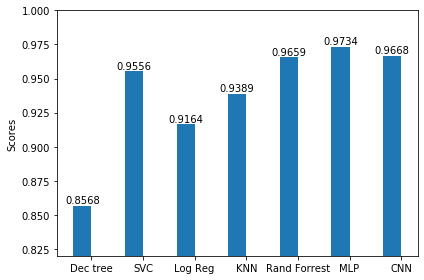

trained with X_train, y_train tested with X_val, y_val
For cnn: X_cnn_train, y_categorical_train and tested with X_cnn_val, y_categorical_val


In [28]:
#gathering scores and plotting them
score = list()
score.append(round(score_decision_tree, 4))
score.append(round(score_svc, 4))
score.append(round(score_log_reg, 4))
score.append(round(score_knn, 4))
score.append(round(score_rfc, 4))
score.append(round(score_mlp, 4))
score.append(round(cnn_test_acc, 4))

labels = ['', 'Dec tree' , 'SVC','Log Reg', 'KNN', 'Rand Forrest', 'MLP', 'CNN']
x = np.arange(len(score))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rect = ax.bar(x - width/2, score, width)
ax.set_ylabel('Scores')
ax.set_xticklabels(labels)
plt.ylim(0.82, 1)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 0),  # 3 points vertical offset
                    textcoords="offset points", ha='center', va='bottom')

autolabel(rect)
fig.tight_layout()
plt.show()
print("trained with X_train, y_train tested with X_val, y_val")
print("For cnn: X_cnn_train, y_categorical_train and tested with X_cnn_val, y_categorical_val")

# Kfold for Random Forest Classifier(rfc) and MLP

In [16]:
#acvtivation algorithm and hidden layer size for MLP
hyper_parameters_mlp = [{"Classifier": 'mlp', "activation": 'identity', "hidden_layer_size": 50},
                        {"Classifier": 'mlp', "activation": 'identity', "hidden_layer_size": 100},
                        {"Classifier": 'mlp', "activation": 'identity', "hidden_layer_size": 150},
                        {"Classifier": 'mlp', "activation": 'logistic', "hidden_layer_size": 50},
                        {"Classifier": 'mlp', "activation": 'logistic', "hidden_layer_size": 100},
                        {"Classifier": 'mlp', "activation": 'logistic', "hidden_layer_size": 150},
                        {"Classifier": 'mlp', "activation": 'tanh', "hidden_layer_size": 50},
                        {"Classifier": 'mlp', "activation": 'tanh', "hidden_layer_size": 100},
                        {"Classifier": 'mlp', "activation": 'tanh', "hidden_layer_size": 150},
                        {"Classifier": 'mlp', "activation": 'relu', "hidden_layer_size": 50},
                        {"Classifier": 'mlp', "activation": 'relu', "hidden_layer_size": 100},
                        {"Classifier": 'mlp', "activation": 'relu', "hidden_layer_size": 150}]

In [17]:
#number of trees in forrest, gini or entropy criteria, and max_depth of each tree for random forrest classifier
hyper_parameters_rfc = [{"Classifier": 'rfc', "criterion": 'gini', "n_estimators": 10},
                        {"Classifier": 'rfc', "criterion": 'gini', "n_estimators": 50},
                        {"Classifier": 'rfc', "criterion": 'gini', "n_estimators": 100},
                        {"Classifier": 'rfc', "criterion": 'gini', "n_estimators": 150},
                        {"Classifier": 'rfc', "criterion": 'gini', "n_estimators": 300},
                        {"Classifier": 'rfc', "criterion": 'entropy', "n_estimators": 10},
                        {"Classifier": 'rfc', "criterion": 'entropy', "n_estimators": 50},
                        {"Classifier": 'rfc', "criterion": 'entropy', "n_estimators": 100},
                        {"Classifier": 'rfc', "criterion": 'entropy', "n_estimators": 150},
                        {"Classifier": 'rfc', "criterion": 'entropy', "n_estimators": 300}]

In [35]:
# activations for convolutional neural network
hyper_parameters_cnn = [{"activation": 'tanh', "batch_size": 32, "epochs": 1},
                        {"activation": 'tanh', "batch_size": 32, "epochs": 2},
                        {"activation": 'tanh', "batch_size": 32, "epochs": 3},
                        {"activation": 'tanh', "batch_size": 64, "epochs": 1},
                        {"activation": 'tanh', "batch_size": 64, "epochs": 2},
                        {"activation": 'tanh', "batch_size": 64, "epochs": 3},
                        {"activation": 'relu', "batch_size": 32, "epochs": 1},
                        {"activation": 'relu', "batch_size": 32, "epochs": 2},
                        {"activation": 'relu', "batch_size": 32, "epochs": 3},
                        {"activation": 'relu', "batch_size": 64, "epochs": 1},
                        {"activation": 'relu', "batch_size": 64, "epochs": 2},
                        {"activation": 'relu', "batch_size": 64, "epochs": 3},
                        {"activation": 'linear', "batch_size": 32, "epochs": 1},
                        {"activation": 'linear', "batch_size": 32, "epochs": 2},
                        {"activation": 'linear', "batch_size": 32, "epochs": 3},
                        {"activation": 'linear', "batch_size": 64, "epochs": 1},
                        {"activation": 'linear', "batch_size": 64, "epochs": 2},
                        {"activation": 'linear', "batch_size": 64, "epochs": 3}]

In [74]:
def kfold_cross_val(k, X, y, model, hyper_parameters_instance):
    kfold = KFold(n_splits = k, shuffle=True, random_state = 123)
    score = list()
    for train, validation in kfold.split(X):
        current_X_train = X[train] 
        current_y_train = y[train]
        current_X_valid = X[validation] 
        current_y_valid = y[validation]
        if(hyper_parameters_instance["Classifier"]=='mlp'):
            model = MLPClassifier(activation = hyper_parameters_instance["activation"]
                                      , hidden_layer_sizes =hyper_parameters_instance["hidden_layer_size"])
        else:
            model = RandomForestClassifier(random_state = 23, n_estimators = hyper_parameters_instance["n_estimators"]
                                           , criterion =  hyper_parameters_instance["criterion"])
        model.fit(current_X_train, current_y_train)
        current_score = model.score(current_X_valid, current_y_valid)
        score.append(current_score)
    return (sum(score)/len(score)) #return mean score

In [75]:
hyper_parameters = list()
mlp_score = list()
rfc_score = list()
hyper_parameters.append(hyper_parameters_rfc)
hyper_parameters.append(hyper_parameters_mlp)
for each_models_parameters in hyper_parameters:
    score = list()
    for hyper_parameters_instance in each_models_parameters:
            print("\nNow preprocessing hyper-parameter instance", hyper_parameters_instance)
            current_score = kfold_cross_val(k=5, X = X_cross_train, y = y_cross_train,  model =model, hyper_parameters_instance=hyper_parameters_instance)
            score.append(current_score)
            print("mean score with theese hyperparameters: ", current_score)
    if(each_models_parameters[0]["Classifier"]=='mlp'):
        mlp_score = score
    else:
        rfc_score = score


Now preprocessing hyper-parameter instance {'Classifier': 'rfc', 'criterion': 'gini', 'n_estimators': 10}
mean score with theese hyperparameters:  0.9008571428571429

Now preprocessing hyper-parameter instance {'Classifier': 'rfc', 'criterion': 'gini', 'n_estimators': 50}
mean score with theese hyperparameters:  0.937

Now preprocessing hyper-parameter instance {'Classifier': 'rfc', 'criterion': 'gini', 'n_estimators': 100}
mean score with theese hyperparameters:  0.9414285714285715

Now preprocessing hyper-parameter instance {'Classifier': 'rfc', 'criterion': 'gini', 'n_estimators': 150}
mean score with theese hyperparameters:  0.9431428571428571

Now preprocessing hyper-parameter instance {'Classifier': 'rfc', 'criterion': 'gini', 'n_estimators': 300}
mean score with theese hyperparameters:  0.9432857142857143

Now preprocessing hyper-parameter instance {'Classifier': 'rfc', 'criterion': 'entropy', 'n_estimators': 10}
mean score with theese hyperparameters:  0.9005714285714286

Now 

C:\Users\hfv\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hfv\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hfv\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hfv\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

mean score with theese hyperparameters:  0.8814285714285715

Now preprocessing hyper-parameter instance {'Classifier': 'mlp', 'activation': 'identity', 'hidden_layer_size': 100}


C:\Users\hfv\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hfv\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hfv\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hfv\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

mean score with theese hyperparameters:  0.8814285714285713

Now preprocessing hyper-parameter instance {'Classifier': 'mlp', 'activation': 'identity', 'hidden_layer_size': 150}


C:\Users\hfv\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hfv\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


mean score with theese hyperparameters:  0.8807142857142857

Now preprocessing hyper-parameter instance {'Classifier': 'mlp', 'activation': 'logistic', 'hidden_layer_size': 50}


C:\Users\hfv\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hfv\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hfv\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hfv\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

mean score with theese hyperparameters:  0.9324285714285715

Now preprocessing hyper-parameter instance {'Classifier': 'mlp', 'activation': 'logistic', 'hidden_layer_size': 100}
mean score with theese hyperparameters:  0.9384285714285715

Now preprocessing hyper-parameter instance {'Classifier': 'mlp', 'activation': 'logistic', 'hidden_layer_size': 150}
mean score with theese hyperparameters:  0.938

Now preprocessing hyper-parameter instance {'Classifier': 'mlp', 'activation': 'tanh', 'hidden_layer_size': 50}
mean score with theese hyperparameters:  0.9298571428571428

Now preprocessing hyper-parameter instance {'Classifier': 'mlp', 'activation': 'tanh', 'hidden_layer_size': 100}
mean score with theese hyperparameters:  0.9367142857142857

Now preprocessing hyper-parameter instance {'Classifier': 'mlp', 'activation': 'tanh', 'hidden_layer_size': 150}
mean score with theese hyperparameters:  0.9385714285714286

Now preprocessing hyper-parameter instance {'Classifier': 'mlp', 'activatio

trained and tested with X_cross_train, y_cross_train


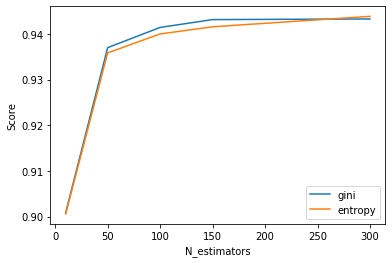

In [58]:
plt.plot([10, 50, 100, 150, 300], rfc_score[0:5], label = 'gini')
plt.plot([10, 50, 100, 150, 300], rfc_score[5:10], label = 'entropy')
plt.xlabel("N_estimators")
plt.ylabel("Score")
plt.legend()
print("trained and tested with X_cross_train, y_cross_train")

trained and tested with X_cross_train, y_cross_train


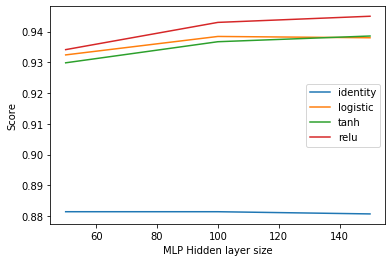

In [80]:
plt.plot([50, 100, 150],mlp_score[0:3], label ='identity')
plt.plot([50, 100, 150],mlp_score[3:6], label ='logistic')
plt.plot([50, 100, 150],mlp_score[6:9], label ='tanh')
plt.plot([50, 100, 150],mlp_score[9:12], label ='relu')
plt.xlabel("MLP Hidden layer size")
plt.ylabel("Score")
plt.legend()
print("trained and tested with X_cross_train, y_cross_train")

# Kfold for CNN

In [38]:
def kfold_cross_val_cnn(k, X, y, model, hyper_parameters_instance):
    kfold = KFold(n_splits = k, shuffle=True, random_state = 123)
    score_cnn = list()
    for train, validation in kfold.split(X):
        curr_X_train = X[train] 
        curr_y_train = y[train]
        curr_X_valid = X[validation] 
        curr_y_valid = y[validation]
        
        current_y_train = to_categorical(curr_y_train)
        current_y_valid = to_categorical(curr_y_valid)
        current_X_train = curr_X_train.reshape(-1, 28,28, 1)
        current_X_valid = curr_X_valid.reshape(-1, 28,28, 1)
        
        model = cnn(hyper_parameters_instance["activation"])
        model.fit(current_X_train, current_y_train, batch_size=hyper_parameters_instance["batch_size"], epochs = hyper_parameters_instance["epochs"])
        current_loss, current_score = model.evaluate(current_X_valid, current_y_valid)
        score_cnn.append(current_score)
    return (sum(score_cnn)/len(score_cnn)) #return mean score

In [39]:
score = list()
for hyper_parameters_instance in hyper_parameters_cnn:
    print("\nNow preprocessing hyper-parameter instance", hyper_parameters_instance)
    current_score = kfold_cross_val_cnn(k=5, X = X_cross_train, y = y_cross_train, model=model, hyper_parameters_instance=hyper_parameters_instance )
    score.append(current_score)
    print("mean score with theese hyperparameters: ", current_score)
    

ValueError: x and y must have same first dimension, but have shapes (3,) and (0,)

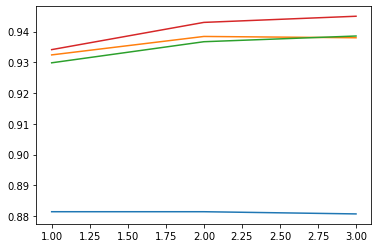

In [77]:
plt.plot([1,2,3], score[0:3], label='tanh, b_size 32')
plt.plot([1,2,3], score[3:6], label ='tanh, b_size 64')
plt.plot([1,2,3], score[6:9], label ='relu, b_size 32')
plt.plot([1,2,3], score[9:12], label ='relu, b_size 64')
plt.plot([1,2,3], score[12:15], label ='linear, b_size 32')
plt.plot([1,2,3], score[15:18], label ='linear, b_size 64')
plt.xlabel("Epochs")
plt.ylabel("Score")
plt.legend()
print("trained and tested with X_cross_train, y_cross_train")

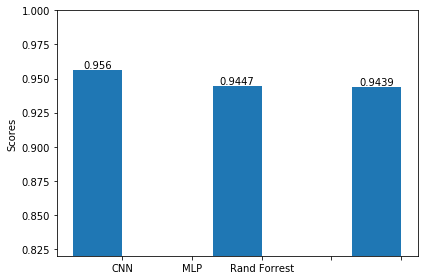

In [69]:
scores = list()
scores.append(round(max(score), 4))
scores.append(round(max(mlp_score), 4))
scores.append(round(max(rfc_score), 4))

labels = ['', 'CNN' , 'MLP','Rand Forrest']
x = np.arange(len(scores))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rect = ax.bar(x - width/2, scores, width)
ax.set_ylabel('Scores')
ax.set_xticklabels(labels)
plt.ylim(0.82, 1)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 0),  # 3 points vertical offset
                    textcoords="offset points", ha='center', va='bottom')

autolabel(rect)
fig.tight_layout()
plt.show()

# Final test for the best classifier with the best hyper parameters found

In [78]:

model = cnn('relu')
y_cnn = to_categorical(y_test)
X_cnn = X_test.reshape(-1,28,28,1)

model.fit(X_cnn_train, y_categorical_train, batch_size=64, epochs = 5)
cnn_loss, final_score = model.evaluate(X_cnn, y_cnn)
print("Final classifier, accuracy on unseen data(X_test, y_test): ", final_score)

Epoch 1/5
41999/41999 [==============================] - 54s 1ms/step - loss: 0.2536 - accuracy: 0.9236
Epoch 2/5
41999/41999 [==============================] - 55s 1ms/step - loss: 0.0754 - accuracy: 0.9765
Epoch 3/5
41999/41999 [==============================] - 56s 1ms/step - loss: 0.0580 - accuracy: 0.9825
Epoch 4/5
41999/41999 [==============================] - 54s 1ms/step - loss: 0.0483 - accuracy: 0.9848
Epoch 5/5
7000/7000 [==============================] - 3s 434us/step
Final classifier, accuracy on unseen data(X_test, y_test):  0.9858571290969849
